## Задание

В соответствии с заданным законом распределения сгенерировать выборку размером 104, оценить плотность вероятности с помощью непараметрических методов: гистограммы и ядерной оценки плотности. Для сравнения на один график нанести аналитическую зависимость и получившиеся оценки.

## Вариант 8

Логнормальное распределение:
$f_X(x; \mu, \sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{\frac{-(\ln x-\mu)^2}{2\sigma^2}}$

c параметрами $\mu = 0$ и $\sigma = 0.25$

In [108]:
from typing import Callable
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

In [111]:
# параметры распределения
MU = 0
SIGMA = 0.25

# выборка
values = np.random.lognormal(MU, SIGMA, 104)

In [112]:
# точки для постороения аналитической кривой
xs = list(np.arange(0, 3, 0.01))
ys = list(st.lognorm.pdf(xs, SIGMA, MU))

In [113]:
class CoreEst():
  """
  Класс для создания ядерного оценщика плотности распределения
  """
  def __init__(self, core: Callable[[float], float], h: float) -> None:
    self.core = core
    self.h = h

  def estimation_gen(self, xs: list[float]) -> Callable[[float], float]:
    """
    Метод для создания функции-оценщика по элементам выборки
    """
    n = len(xs)

    def est_xi(x: float) -> float:
      return 1/(n*self.h)*np.sum([self.core((x - x_i)/self.h) for x_i in xs])

    return est_xi


def norm_core(x: float) -> float:
  """
  Стандартное нормальное ядро
  """
  return 1/(np.sqrt(2*np.pi))*np.exp(-1*x**2/2)

In [114]:
# создаём предсказатель по данным исследуемой выборки
estimator = CoreEst(norm_core, 0.15).estimation_gen(values)

# находим с его помощью точки для построения оценочной кривой плотности распределения
est_ys = [estimator(xi) for xi in xs]

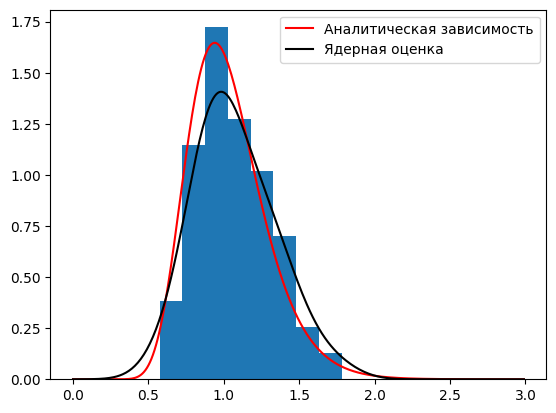

In [130]:
fig, ax = plt.subplots(1, 1)

ax.hist(values, density=True, bins='auto')
ax.plot(xs, ys, label='Аналитическая зависимость', color='r')
ax.plot(xs, est_ys, label='Ядерная оценка', color='black')

plt.legend()
plt.show()